Step 1: Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



Step 2: Load Dataset

In [2]:
# Load your dataset

df = pd.read_csv('data.csv')
df

,OrderHeaderKey,FirstInvoiceDate,ItemNumber,OrderedQuantity,NetPrice,GrossPrice,Currency,dnzEntityNumber,OrderUserID,isErrorPresent
0,titan-cs-169207,1.742860e+12,AY8704,1.0,375.54,1138.36,USD,241,jperkins,False
1,titan-cs-169462,1.742860e+12,fn4332,100.0,227.28,631.91,USD,241,jackieh,False
2,titan-cs-169462,1.742860e+12,gk0028,100.0,136.47,452.90,USD,241,jackieh,False
3,titan-cs-169425,1.742860e+12,HP3684,84.0,155.89,644.17,USD,241,jperkins,False
4,titan-cs-169429,1.742860e+12,GK2072,1.0,171.64,675.67,USD,241,jperkins,False
...,...,...,...,...,...,...,...,...,...,...
425298,titan-uv-1575084,1.744240e+12,4C3552,9.0,39.91,121.46,USD,276,EDI,False
425299,titan-uv-1574574,1.744240e+12,FK0088,3.0,143.67,295.87,USD,276,EDI,False
425300,titan-uv-1574574,1.744240e+12,FM9054,1.0,148.53,305.87,USD,276,EDI,False
425301,titan-uv-1574574,1.744240e+12,GC7247,1.0,132.04,271.91,USD,276,EDI,False


Step 3: Data Preprocessing

In [3]:
# Preprocess the data

null_df = df.isnull()
any_nulls = np.any(null_df)
print(any_nulls)

False


In [4]:
# Impute missing values (NaN) with the most frequent values in the data

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_freq = pd.DataFrame(imp.fit_transform(df), columns = df.columns)

df_freq.head()

,OrderHeaderKey,FirstInvoiceDate,ItemNumber,OrderedQuantity,NetPrice,GrossPrice,Currency,dnzEntityNumber,OrderUserID,isErrorPresent
0,titan-cs-169207,1742860000000.0,AY8704,1.0,375.54,1138.36,USD,241,jperkins,False
1,titan-cs-169462,1742860000000.0,fn4332,100.0,227.28,631.91,USD,241,jackieh,False
2,titan-cs-169462,1742860000000.0,gk0028,100.0,136.47,452.9,USD,241,jackieh,False
3,titan-cs-169425,1742860000000.0,HP3684,84.0,155.89,644.17,USD,241,jperkins,False
4,titan-cs-169429,1742860000000.0,GK2072,1.0,171.64,675.67,USD,241,jperkins,False


In [5]:
# Change dataset columns back to original column names.

df_freq.columns = df.columns
df_freq.head()

,OrderHeaderKey,FirstInvoiceDate,ItemNumber,OrderedQuantity,NetPrice,GrossPrice,Currency,dnzEntityNumber,OrderUserID,isErrorPresent
0,titan-cs-169207,1742860000000.0,AY8704,1.0,375.54,1138.36,USD,241,jperkins,False
1,titan-cs-169462,1742860000000.0,fn4332,100.0,227.28,631.91,USD,241,jackieh,False
2,titan-cs-169462,1742860000000.0,gk0028,100.0,136.47,452.9,USD,241,jackieh,False
3,titan-cs-169425,1742860000000.0,HP3684,84.0,155.89,644.17,USD,241,jperkins,False
4,titan-cs-169429,1742860000000.0,GK2072,1.0,171.64,675.67,USD,241,jperkins,False


In [6]:
# Store the final database in the variable `df`

df = df_freq
df.head()

,OrderHeaderKey,FirstInvoiceDate,ItemNumber,OrderedQuantity,NetPrice,GrossPrice,Currency,dnzEntityNumber,OrderUserID,isErrorPresent
0,titan-cs-169207,1742860000000.0,AY8704,1.0,375.54,1138.36,USD,241,jperkins,False
1,titan-cs-169462,1742860000000.0,fn4332,100.0,227.28,631.91,USD,241,jackieh,False
2,titan-cs-169462,1742860000000.0,gk0028,100.0,136.47,452.9,USD,241,jackieh,False
3,titan-cs-169425,1742860000000.0,HP3684,84.0,155.89,644.17,USD,241,jperkins,False
4,titan-cs-169429,1742860000000.0,GK2072,1.0,171.64,675.67,USD,241,jperkins,False


In [7]:
# Check the type of data in each column.

df.dtypes

OrderHeaderKey      object
FirstInvoiceDate    object
ItemNumber          object
OrderedQuantity     object
NetPrice            object
GrossPrice          object
Currency            object
dnzEntityNumber     object
OrderUserID         object
isErrorPresent      object
dtype: object

In [8]:
# Revert specific columns types back to numbers

strings_list = ['OrderHeaderKey', 'FirstInvoiceDate', 
                'ItemNumber', 'OrderedQuantity', 'NetPrice', 'GrossPrice', 'Currency', 'dnzEntityNumber', 'OrderUserID', 'isErrorPresent']

le = preprocessing.LabelEncoder()

for index in strings_list:
    df[index] = le.fit_transform(df[index])

df.dtypes

OrderHeaderKey      int32
FirstInvoiceDate    int32
ItemNumber          int32
OrderedQuantity     int32
NetPrice            int32
GrossPrice          int32
Currency            int32
dnzEntityNumber     int32
OrderUserID         int32
isErrorPresent      int32
dtype: object

Step 4: Plotting

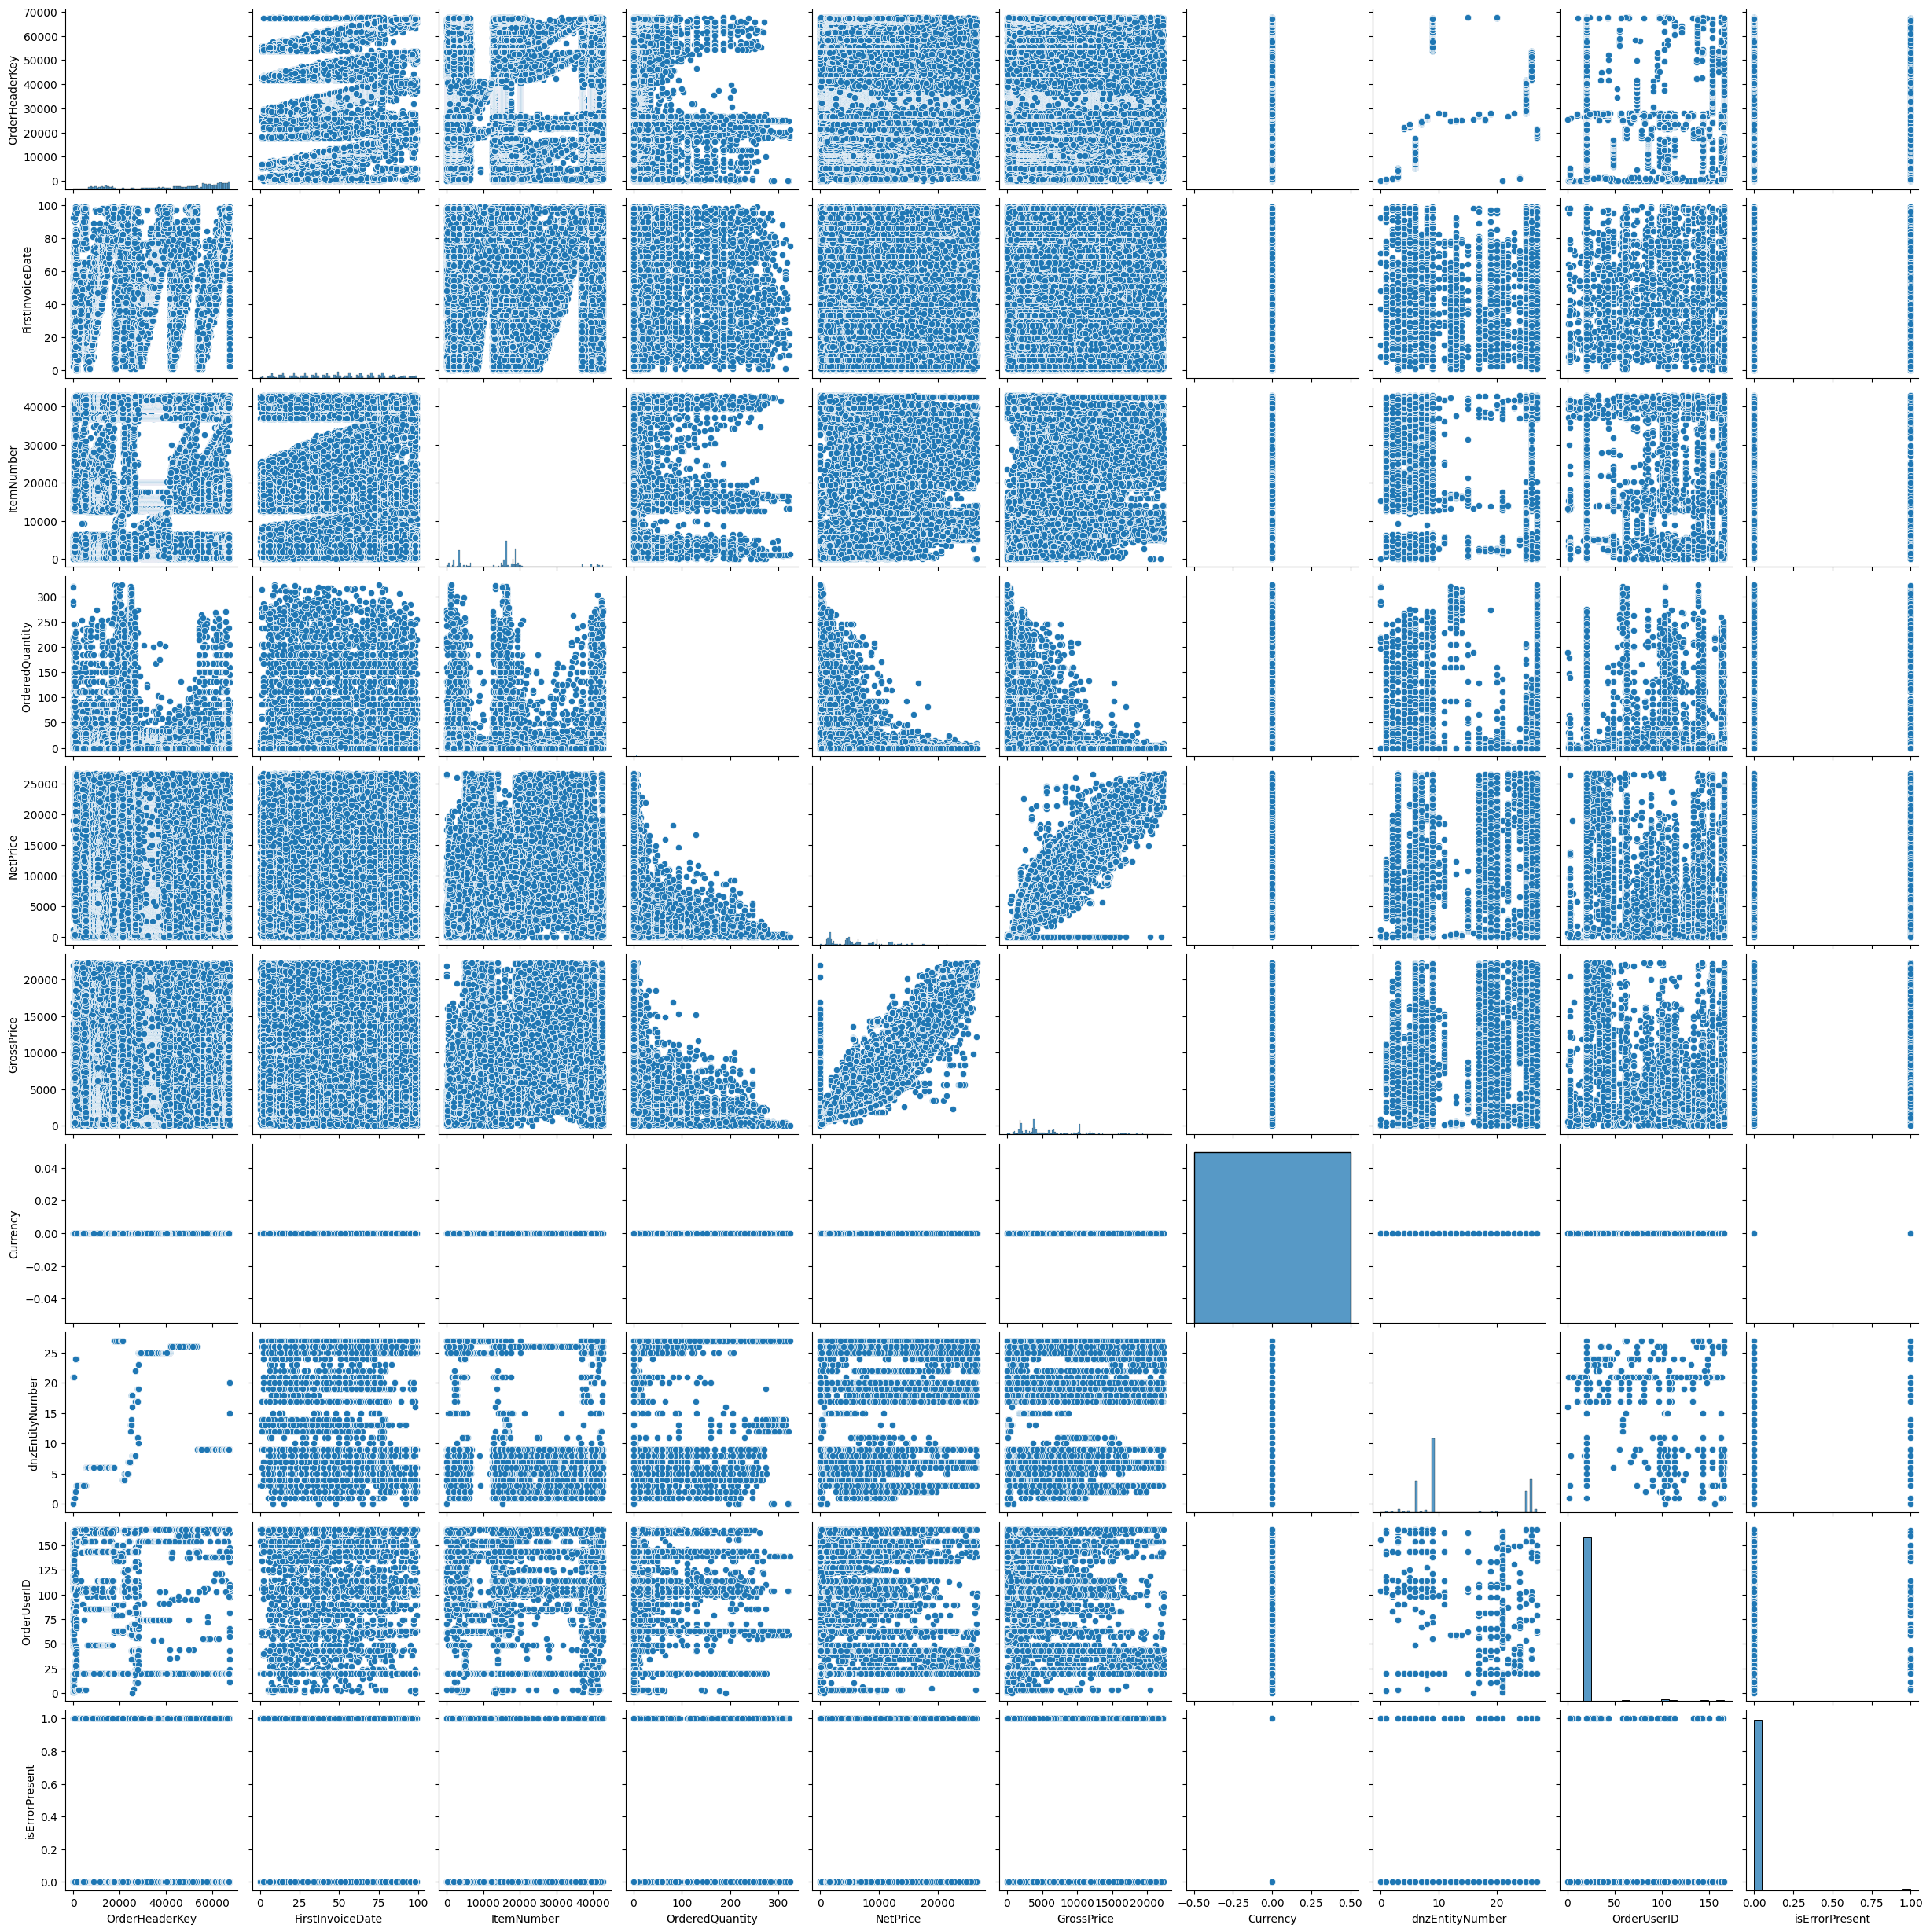

In [ ]:
# Scatter plot to plot the target value against individual input variable

sns.pairplot(df)

plt.show()

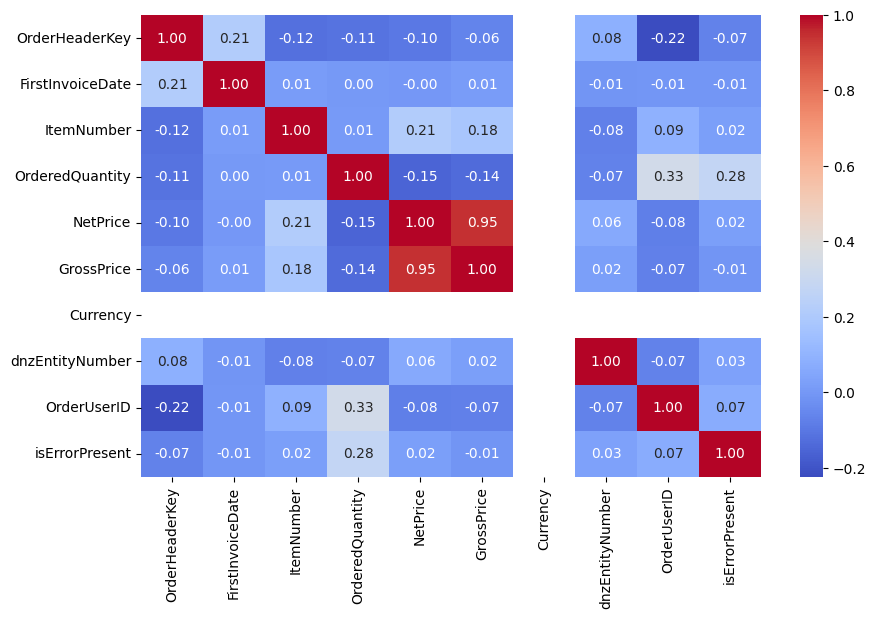

In [ ]:
# Heatmap plot to plot the target value against individual input variable

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Step 5: Splitting Data

In [11]:
T = df.loc[:, 'isErrorPresent'].copy()
X = df.iloc[:, :-1].copy()

X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2, random_state=0)

print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(425303, 9) (340242, 9) (85061, 9) (340242,) (85061,)


In [12]:
# Standardize the features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
def evaluation_report(model, data):
    X_train, X_test, t_train, t_test = data
    
    train_score = model.score(X_train, t_train)
    test_score = model.score(X_test, t_test)
    
    return train_score, test_score

Step 6: DecisionTreeClassifier

In [23]:
# Initialize the base classifier

base_clf = DecisionTreeClassifier()

# Train the model

base_clf.fit(X_train, t_train)

# Make predictions

pred = base_clf.predict(X_test)

# Evaluate the model
train_score, test_score = evaluation_report(base_clf,  (X_train, X_test, t_train, t_test))
print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

print(classification_report(t_test, pred))

Train Accuracy: 1.0
Test Accuracy: 0.9954738364232727

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84533
           1       0.64      0.64      0.64       528

    accuracy                           1.00     85061
   macro avg       0.82      0.82      0.82     85061
weighted avg       1.00      1.00      1.00     85061



Cross-validation scores: [0.9956355  0.99507708 0.99503292 0.99495944 0.99532683]
Mean cross-validation score: 0.9952063522437846
[[84342   191]
 [  188   340]]


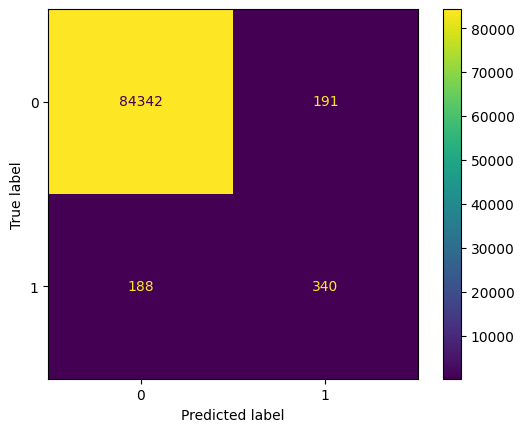

In [15]:
# Perform k-fold cross-validation

cv_scores = cross_val_score(base_clf, X_train, t_train, cv=5)

print("Cross-validation scores:", cv_scores)

print("Mean cross-validation score:", np.mean(cv_scores))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(base_clf, X_test, t_test)
plt.show


# Print confusion matrix

cm = confusion_matrix(t_test, pred)
print(cm)

Step 7: AdaBoostClassifier

In [16]:
# Initialize the base classifier

base_clf = DecisionTreeClassifier()

# Initialize AdaBoost with the base classifier

ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model

ada_clf.fit(X_train, t_train)

# Make predictions

pred = ada_clf.predict(X_test)

# Evaluate the model
train_score, test_score = evaluation_report(ada_clf,  (X_train, X_test, t_train, t_test))
print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

print(classification_report(t_test, pred))

C:\Users\jahja\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Accuracy: 1.0
Test Accuracy: 0.9954150550781204

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84533
           1       0.63      0.63      0.63       528

    accuracy                           1.00     85061
   macro avg       0.81      0.82      0.81     85061
weighted avg       1.00      1.00      1.00     85061



C:\Users\jahja\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jahja\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jahja\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jahja\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Cross-validation scores: [0.99556202 0.99506238 0.99498883 0.99494474 0.99532683]
Mean cross-validation score: 0.9951769614848253
[[84336   197]
 [  193   335]]


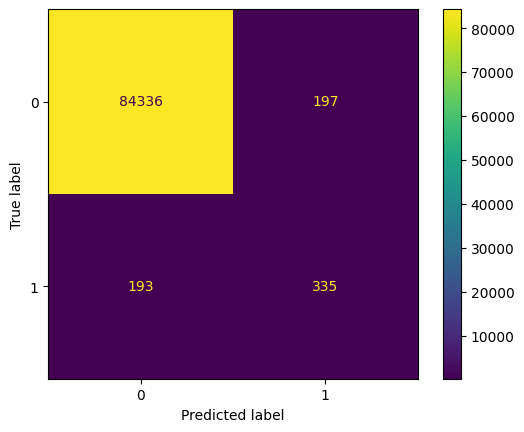

In [17]:
# Perform k-fold cross-validation

cv_scores = cross_val_score(ada_clf, X_train, t_train, cv=5)

print("Cross-validation scores:", cv_scores)

print("Mean cross-validation score:", np.mean(cv_scores))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(ada_clf, X_test, t_test)
plt.show


# Print confusion matrix

cm = confusion_matrix(t_test, pred)
print(cm)

Step 7: Pruned DecisionTreeClassifier

In [18]:
pruned_tree = DecisionTreeClassifier(random_state=0, max_depth=4)

pruned_tree.fit(X_train, t_train)

train_score, test_score = evaluation_report(pruned_tree, (X_train, X_test, t_train, t_test))

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")
print(classification_report(t_test, pred))

Train Accuracy: 0.9948007594594436
Test Accuracy: 0.9946744101292014

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84533
           1       0.63      0.63      0.63       528

    accuracy                           1.00     85061
   macro avg       0.81      0.82      0.81     85061
weighted avg       1.00      1.00      1.00     85061



Cross-validation scores: [0.99488604 0.9946803  0.99465083 0.99478309 0.99468023]
Mean cross-validation score: 0.9947360993230017
[[84336   197]
 [  193   335]]


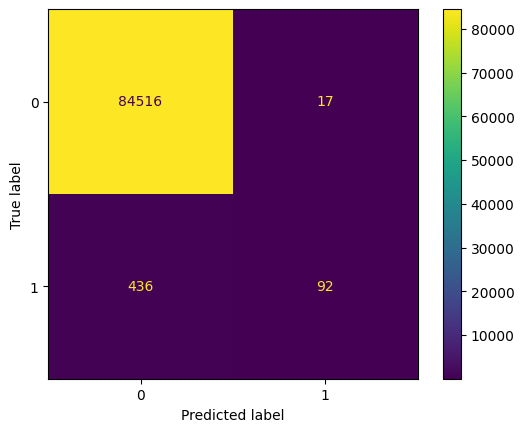

In [19]:
# Perform k-fold cross-validation

cv_scores = cross_val_score(pruned_tree, X_train, t_train, cv=5)

print("Cross-validation scores:", cv_scores)

print("Mean cross-validation score:", np.mean(cv_scores))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(pruned_tree, X_test, t_test)
plt.show


# Print confusion matrix

cm = confusion_matrix(t_test, pred)
print(cm)

Step : Pruned RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, warm_start=True, oob_score=True, max_depth=4)

rf.fit(X_train, t_train)

train_score, test_score = evaluation_report(rf, (X_train, X_test, t_train, t_test))
pred = rf.predict(X_test)

# Evaluate the model
print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")
print(classification_report(t_test, pred))

Train Accuracy: 0.9947596122759683
Test Accuracy: 0.9947331914743537

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     84533
           1       0.87      0.18      0.30       528

    accuracy                           0.99     85061
   macro avg       0.93      0.59      0.65     85061
weighted avg       0.99      0.99      0.99     85061



Cross-validation scores: [0.99669356 0.99648782 0.99657595 0.9967229  0.99678168]
Mean cross-validation score: 0.9966523830784622
[[84510    23]
 [  245   283]]


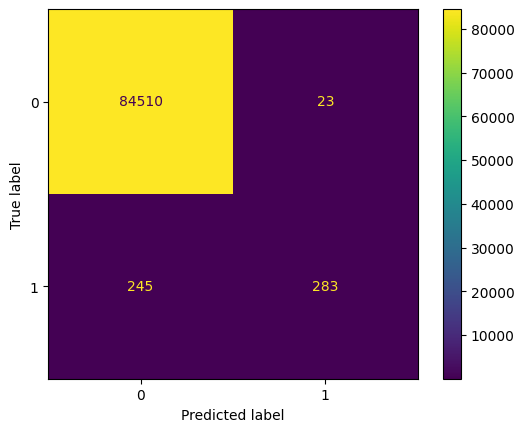

In [21]:
# Perform k-fold cross-validation

cv_scores = cross_val_score(rf, X_train, t_train, cv=5)

print("Cross-validation scores:", cv_scores)

print("Mean cross-validation score:", np.mean(cv_scores))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, t_test)
plt.show


# Print confusion matrix

cm = confusion_matrix(t_test, pred)
print(cm)